# Лабораторная работа 3. 
# Сетевые алгоритмы. Динамические алгоритмы поиска путей.


## Выполнил студент группы Семин Артем Павлович БФИ2301
***

### Задание

1.  Реализовать алгоритм поиска кратчайшего расстояния между двумя вершинами ориентированного взвешенного графа в соответствии с вариантом. 

2.  Предусмотреть задание графа в виде матрицы смежности/инцидентности, читаемой из файла, либо графически с помощью пользовательского интерфейса. 

3.  Разработать графический интерфейс пользователя с визуализацией графа и отображением кратчайшего расстояния между задаваемыми пользователем вершинами.

4. По результатам работы проанализировать временную сложность работы заданного алгоритма в зависимости от числа узлов и ребер графа.
Данные представить в виде таблицы.



### Алгоритмы:

Алгоритм Флойда-Уоршелла| Алгоритм Дейкстры | Алгоритм Беллмана-Форда | Алгоритм Джонсона| Алгоритм Левита | Алгоритм Йена



### Выполнение:

Алгоритм Дейкстры


Задание № 1

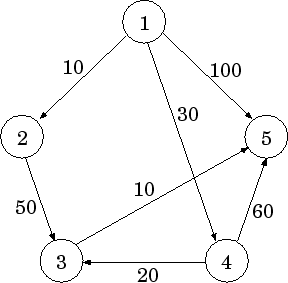


In [10]:
from collections import defaultdict

input_list = [[1, 2, 10], [1, 5, 100], [1, 4, 30], [2, 3, 50], [3, 5, 10], [4, 3, 20], [4, 5, 60]]
number_of_elements = 5
source = 1
target = 5

# Инициализируем граф
graph = defaultdict(list)
# Заполняем граф: вершина -> (стоимость, вершина куда можем прийти)
for a, b, cost in input_list:
    graph[a] += [(cost, b)]

# Инициализируем список вершин для посещения
nodes_to_visit = []
# Добавляем нашу исходную с расстоянием равным нулю
nodes_to_visit.append((0, source))
# Инициализируем список уникальных значений для хранения вершин которые уже посетили
visited = set()
# Заполняем расстояния до всех остальных вершие
min_dist = {i: float('inf') for i in range(1, number_of_elements + 1)}
# Заполняем расстояние до текущей вершины
min_dist[source] = 0
# Проходимся по всем вершинам которые нужно посетить
# Проходимся до тех пор, пока такие вершины есть
while len(nodes_to_visit):
    # Берем самую близкую вершину к нам
    # cost - стоимость попадания, node - название вершины
    cost, node = min(nodes_to_visit)
    # Удаляем эту вершину из списка вершин для посещения
    nodes_to_visit.remove((cost, node))
    # Проверяем что мы в нее еще не заходили (если вдруг мы сначала добавили (9,7), а потом (6,7)
    if node in visited:
        continue
    # Добавляем в список посещенных
    visited.add(node)
    # Проходимся по всем соединенным вершинам
    # n_cost - стоимость попадания из текущей вершины, n_node - прикрепленная вершина, в которую хотим попасть
    for n_cost, n_node in graph[node]:
        # Проверяем нашли ли мы оптимальный путь
        if cost + n_cost < min_dist[n_node] and n_node not in visited:
            # Если нашли то обновляем значение расстояния
            min_dist[n_node] = cost + n_cost
            # И добавляем эту вершину в список вершин для посещения
            nodes_to_visit.append((cost + n_cost, n_node))

# Выводим ответ
print(min_dist[target])

60


Задание № 2 Чтение графа из файла (матрица смежности)

In [15]:
from collections import defaultdict

def read_matrix(filename):
    with open(filename, 'r') as f:
        matrix = []
        for line in f:
            row = list(map(int, line.strip().split()))
            matrix.append(row)
    num_nodes = len(matrix)
    edges = []
    for i in range(num_nodes):
        for j in range(num_nodes):
            if matrix[i][j] > 0:
                edges.append((i+1, j+1, matrix[i][j]))
    return edges, num_nodes


edges, num_nodes = read_matrix('matrix.txt')
print("Рёбра:", edges)
print("Количество вершин:", num_nodes)

Рёбра: [(1, 2, 10), (1, 4, 30), (1, 5, 100), (2, 3, 50), (3, 5, 10), (4, 3, 20), (4, 5, 60)]
Количество вершин: 5


Задание № 3 Графический интерфейс и визуализация

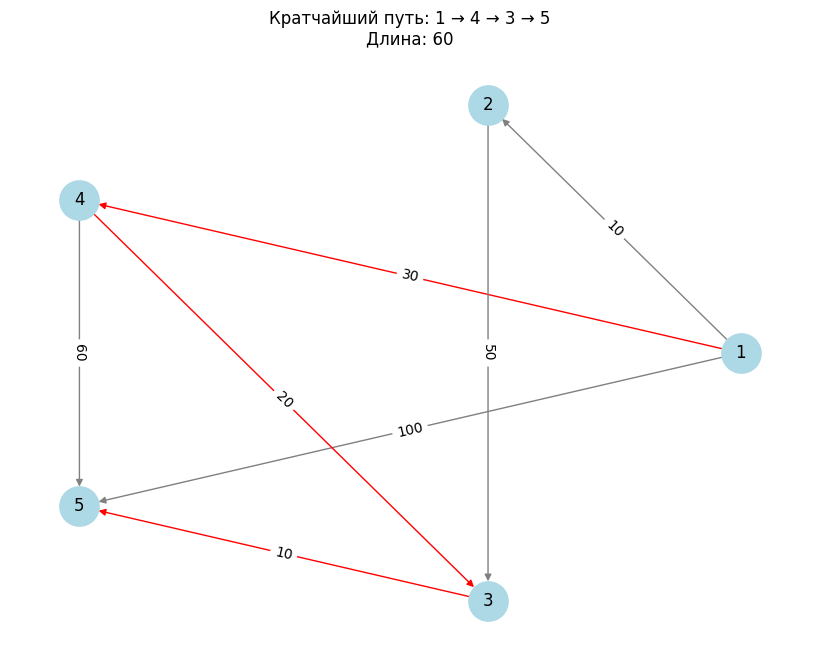

In [18]:
import matplotlib.pyplot as plt
import networkx as nx

# 1. Чтение графа из файла
def read_graph(filename):
    edges = []
    with open(filename, 'r') as f:
        lines = f.readlines()
        for i, line in enumerate(lines):
            weights = list(map(int, line.strip().split()))
            for j, weight in enumerate(weights):
                if weight > 0:
                    edges.append((i+1, j+1, weight))
    return edges, len(lines)

edges, num_nodes = read_graph('matrix.txt')

# 2. Ввод вершин
source = int(input("Введите начальную вершину (1-" + str(num_nodes) + "): "))
target = int(input("Введите целевую вершину (1-" + str(num_nodes) + "): "))

# 3. Алгоритм Дейкстры (упрощенный)
def dijkstra(edges, start, end):
    graph = {i: [] for i in range(1, num_nodes+1)}
    for a, b, w in edges:
        graph[a].append((b, w))
    
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    visited = set()
    path = []

    while True:
        min_node = None
        for node in graph:
            if node not in visited and (min_node is None or distances[node] < distances[min_node]):
                min_node = node
        
        if min_node is None or min_node == end:
            break
            
        for neighbor, weight in graph[min_node]:
            if distances[min_node] + weight < distances[neighbor]:
                distances[neighbor] = distances[min_node] + weight
                
        visited.add(min_node)
    
    # Восстановление пути (упрощенное)
    current = end
    while current != start:
        path.insert(0, current)
        for a, b, w in edges:
            if b == current and distances[current] == distances[a] + w:
                current = a
                break
    path.insert(0, start)
    
    return distances[end], path if path[0] == start else []

# 4. Визуализация
distance, path = dijkstra(edges, source, target)

G = nx.DiGraph()
G.add_weighted_edges_from([(a, b, w) for a, b, w in edges])

pos = nx.circular_layout(G)  # Фиксированное расположение
edge_colors = ['red' if (u, v) in zip(path[:-1], path[1:]) else 'gray' for u, v in G.edges()]

plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_color='lightblue', 
        edge_color=edge_colors, arrows=True, node_size=800)
nx.draw_networkx_edge_labels(G, pos, 
                            edge_labels={(u, v): w for u, v, w in edges})

plt.title(f"Кратчайший путь: {' → '.join(map(str, path))}\nДлина: {distance}")
plt.show()

Задание № 4 Анализ временной сложности

In [ ]:
!pip install pandas

In [14]:
import time
import random
import pandas as pd

def generate_graph(V, density=0.5):
    edges = []
    for i in range(1, V+1):
        for j in range(1, V+1):
            if i != j and random.random() < density:
                edges.append((i, j, random.randint(1, 100)))
    return edges, V

def measure_time(V, E):
    edges, num_nodes = generate_graph(V, E/(V*(V-1)) if V > 1 else 0)
    source = 1
    start = time.time()
    dijkstra(edges, num_nodes, source)
    return time.time() - start

# Тестирование
data = []
for V in [10, 50, 100, 200]:
    E = V * (V-1)  # Плотный граф
    t = measure_time(V, E)
    data.append({'Вершины': V, 'Рёбра': E, 'Время (с)': t})

df = pd.DataFrame(data)
print(df)

   Вершины  Рёбра  Время (с)
0       10     90   0.000050
1       50   2450   0.000935
2      100   9900   0.004462
3      200  39800   0.018899
